In [1]:
import pandas as pd

In [11]:
# 혜화동 식당 데이터 불러오기
hyehwa = pd.read_csv('Hyehwa.csv')

In [12]:
# 데이터 확인
hyehwa.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220805454448,낫컴플리트,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,...,1.111020e+24,NaN,서울특별시 종로구 성균관로 12-5,110530,3074,NaN,2,NaN,126.998096,37.584204
1,MA010120220805466468,유환푸드,NaN,I2,음식,I201,한식,I20105,국수/칼국수,I56112,...,1.111020e+24,NaN,서울특별시 종로구 창경궁로35길 13,110530,3076,NaN,1,NaN,127.001484,37.586557
2,MA010120220805488786,버거파크,NaN,I2,음식,I210,기타 간이,I21004,버거,I56111,...,1.111020e+24,NaN,서울특별시 종로구 대학로11길 5,110530,3079,NaN,NaN,NaN,127.001350,37.582159
3,MA010120220805501127,디오엠,NaN,I2,음식,I211,주점,I21104,요리 주점,I56219,...,1.111020e+24,NaN,서울특별시 종로구 성균관로 4-8,110530,3074,NaN,1,NaN,126.998727,37.583615
4,MA010120220805505906,명륜진사갈비,NaN,I2,음식,I201,한식,I20107,돼지고기 구이/찜,I56113,...,1.111020e+24,성균관대학교,서울특별시 종로구 성균관로 25-1,110745,3063,NaN,1,NaN,126.995108,37.585827


In [13]:
# 필요한 컬럼만 정리
hyehwa = hyehwa[['상호명', '행정동명', '위도', '경도']]

In [14]:
# 컬럼명 단순화
hyehwa.columns = ['name',  # 상호명
                  'dong',  # 행정동명
                  'lon',  # 위도
                  'lat'  # 경도
                  ]

# 크롤링

In [2]:
# 필요한 라이브러리 임포트
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
import time
import numpy as np
import requests
from bs4 import BeautifulSoup

In [3]:
# 크롬 웹 드라이버 설정 

chromedriver = r'C:/Users/Admin/OneDrive/바탕 화면/Sungkyun University/YeomWon/Python/Driver/chromedriver-win64/chromedriver' 
driver = webdriver.Chrome(chromedriver) 

C:\Users\Admin\AppData\Local\Temp/ipykernel_2604/3591893826.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chromedriver)


In [17]:
# [~동 @@식당]으로 검색어 설정

hyehwa['naver_keyword'] = hyehwa['dong'] + " " + hyehwa['name'] 
hyehwa['naver_map_url'] = ''
hyehwa.head()

,name,dong,lon,lat,naver_keyword,naver_map_url
0,낫컴플리트,혜화동,37.584204,126.998096,혜화동 낫컴플리트,
1,유환푸드,혜화동,37.586557,127.001484,혜화동 유환푸드,
2,버거파크,혜화동,37.582159,127.001350,혜화동 버거파크,
3,디오엠,혜화동,37.583615,126.998727,혜화동 디오엠,
4,명륜진사갈비,혜화동,37.585827,126.995108,혜화동 명륜진사갈비,


In [18]:
# 가게 상세페이지의 URL 수집

for i, keyword in enumerate(hyehwa['naver_keyword'].tolist()):
    print("이번에 찾을 키워드 :", i, f"/ {hyehwa.shape[0] -1} 행", keyword)
    try:
        naver_map_search_url = f"https://m.map.naver.com/search2/search.naver?query={keyword}&sm=hty&style=v5#/list"
        
        driver.get(naver_map_search_url)
        time.sleep(3.5)
        hyehwa.iloc[i,-1] = driver.find_element_by_css_selector("#ct > div.search_listview._content._ctList > ul > li:nth-child(1) > div.item_info > a.a_item.a_item_distance._linkSiteview").get_attribute('data-cid')
        # 네이버 지도 시스템은 data-cid에 url 파라미터를 저장.
        # data-cid 번호를 뽑아두었다가 기본 url 템플릿에 넣어 최종적인 url을 완성.
        
        #검색 결과가 없다면
    except Exception as e1:
        if "li:nth-child(1)" in str(e1):  # -> "child(1)이 없던데요?"
            try:
                hyehwa.iloc[i,-1] = driver.find_element_by_css_selector("#ct > div.search_listview._content._ctList > ul > li:nth-child(1) > div.item_info > a.a_item.a_item_distance._linkSiteview").get_attribute('data-cid')
                time.sleep(1)
            except Exception as e2:
                print(e2)
                hyehwa.iloc[i,-1] = np.nan
                time.sleep(1)
        else:
            pass


driver.quit()

이번에 찾을 키워드 : 0 / 607 행 혜화동 낫컴플리트


C:\Users\Admin\AppData\Local\Temp/ipykernel_17032/1736269362.py:10: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  hyehwa.iloc[i,-1] = driver.find_element_by_css_selector("#ct > div.search_listview._content._ctList > ul > li:nth-child(1) > div.item_info > a.a_item.a_item_distance._linkSiteview").get_attribute('data-cid')


이번에 찾을 키워드 : 1 / 607 행 혜화동 유환푸드


C:\Users\Admin\AppData\Local\Temp/ipykernel_17032/1736269362.py:18: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  hyehwa.iloc[i,-1] = driver.find_element_by_css_selector("#ct > div.search_listview._content._ctList > ul > li:nth-child(1) > div.item_info > a.a_item.a_item_distance._linkSiteview").get_attribute('data-cid')


Message: no such element: Unable to locate element: {"method":"css selector","selector":"#ct > div.search_listview._content._ctList > ul > li:nth-child(1) > div.item_info > a.a_item.a_item_distance._linkSiteview"}
  (Session info: chrome=117.0.5938.92)
Stacktrace:
	GetHandleVerifier [0x00007FF636897892+54818]
	(No symbol) [0x00007FF636806AC2]
	(No symbol) [0x00007FF6366BDA3B]
	(No symbol) [0x00007FF6366FE4FC]
	(No symbol) [0x00007FF6366FE67C]
	(No symbol) [0x00007FF636739627]
	(No symbol) [0x00007FF63671EAEF]
	(No symbol) [0x00007FF6367375A2]
	(No symbol) [0x00007FF63671E883]
	(No symbol) [0x00007FF6366F3691]
	(No symbol) [0x00007FF6366F48D4]
	GetHandleVerifier [0x00007FF636BFB992+3610402]
	GetHandleVerifier [0x00007FF636C51860+3962352]
	GetHandleVerifier [0x00007FF636C49D4F+3930847]
	GetHandleVerifier [0x00007FF636933646+693206]
	(No symbol) [0x00007FF636811628]
	(No symbol) [0x00007FF63680D934]
	(No symbol) [0x00007FF63680DA62]
	(No symbol) [0x00007FF6367FE113]
	BaseThreadInitThunk [

이번에 찾을 키워드 : 32 / 607 행 혜화동 달곰집
이번에 찾을 키워드 : 33 / 607 행 혜화동 이삭토스트
이번에 찾을 키워드 : 34 / 607 행 혜화동 역전할머니맥주
이번에 찾을 키워드 : 35 / 607 행 혜화동 혜화역4번출구카페제이드
Message: no such element: Unable to locate element: {"method":"css selector","selector":"#ct > div.search_listview._content._ctList > ul > li:nth-child(1) > div.item_info > a.a_item.a_item_distance._linkSiteview"}
  (Session info: chrome=117.0.5938.92)
Stacktrace:
	GetHandleVerifier [0x00007FF636897892+54818]
	(No symbol) [0x00007FF636806AC2]
	(No symbol) [0x00007FF6366BDA3B]
	(No symbol) [0x00007FF6366FE4FC]
	(No symbol) [0x00007FF6366FE67C]
	(No symbol) [0x00007FF636739627]
	(No symbol) [0x00007FF63671EAEF]
	(No symbol) [0x00007FF6367375A2]
	(No symbol) [0x00007FF63671E883]
	(No symbol) [0x00007FF6366F3691]
	(No symbol) [0x00007FF6366F48D4]
	GetHandleVerifier [0x00007FF636BFB992+3610402]
	GetHandleVerifier [0x00007FF636C51860+3962352]
	GetHandleVerifier [0x00007FF636C49D4F+3930847]
	GetHandleVerifier [0x00007FF636933646+693206]
	(No symbol) [0

이번에 찾을 키워드 : 62 / 607 행 혜화동 정돈
이번에 찾을 키워드 : 63 / 607 행 혜화동 하늘아래바람
이번에 찾을 키워드 : 64 / 607 행 혜화동 미정국수0410
이번에 찾을 키워드 : 65 / 607 행 혜화동 히메카츠
이번에 찾을 키워드 : 66 / 607 행 혜화동 히든스시
이번에 찾을 키워드 : 67 / 607 행 혜화동 고쿠텐
이번에 찾을 키워드 : 68 / 607 행 혜화동 춘참치포차
이번에 찾을 키워드 : 69 / 607 행 혜화동 연건호스피탈리티그룹
Message: no such element: Unable to locate element: {"method":"css selector","selector":"#ct > div.search_listview._content._ctList > ul > li:nth-child(1) > div.item_info > a.a_item.a_item_distance._linkSiteview"}
  (Session info: chrome=117.0.5938.92)
Stacktrace:
	GetHandleVerifier [0x00007FF636897892+54818]
	(No symbol) [0x00007FF636806AC2]
	(No symbol) [0x00007FF6366BDA3B]
	(No symbol) [0x00007FF6366FE4FC]
	(No symbol) [0x00007FF6366FE67C]
	(No symbol) [0x00007FF636739627]
	(No symbol) [0x00007FF63671EAEF]
	(No symbol) [0x00007FF6367375A2]
	(No symbol) [0x00007FF63671E883]
	(No symbol) [0x00007FF6366F3691]
	(No symbol) [0x00007FF6366F48D4]
	GetHandleVerifier [0x00007FF636BFB992+3610402]
	GetHandleVerifier [0x00007

이번에 찾을 키워드 : 104 / 607 행 혜화동 창경궁로240
이번에 찾을 키워드 : 105 / 607 행 혜화동 커피온리혜화역
Message: no such element: Unable to locate element: {"method":"css selector","selector":"#ct > div.search_listview._content._ctList > ul > li:nth-child(1) > div.item_info > a.a_item.a_item_distance._linkSiteview"}
  (Session info: chrome=117.0.5938.92)
Stacktrace:
	GetHandleVerifier [0x00007FF636897892+54818]
	(No symbol) [0x00007FF636806AC2]
	(No symbol) [0x00007FF6366BDA3B]
	(No symbol) [0x00007FF6366FE4FC]
	(No symbol) [0x00007FF6366FE67C]
	(No symbol) [0x00007FF636739627]
	(No symbol) [0x00007FF63671EAEF]
	(No symbol) [0x00007FF6367375A2]
	(No symbol) [0x00007FF63671E883]
	(No symbol) [0x00007FF6366F3691]
	(No symbol) [0x00007FF6366F48D4]
	GetHandleVerifier [0x00007FF636BFB992+3610402]
	GetHandleVerifier [0x00007FF636C51860+3962352]
	GetHandleVerifier [0x00007FF636C49D4F+3930847]
	GetHandleVerifier [0x00007FF636933646+693206]
	(No symbol) [0x00007FF636811628]
	(No symbol) [0x00007FF63680D934]
	(No symbol) [0x

이번에 찾을 키워드 : 157 / 607 행 혜화동 진공푸
이번에 찾을 키워드 : 158 / 607 행 혜화동 아트트레블에이치
이번에 찾을 키워드 : 159 / 607 행 혜화동 육식주
이번에 찾을 키워드 : 160 / 607 행 혜화동 파이앤브라우니
이번에 찾을 키워드 : 161 / 607 행 혜화동 벤프
이번에 찾을 키워드 : 162 / 607 행 혜화동 여기가좋겠네2
이번에 찾을 키워드 : 163 / 607 행 혜화동 영일식당
이번에 찾을 키워드 : 164 / 607 행 혜화동 퀸101
이번에 찾을 키워드 : 165 / 607 행 혜화동 레드핑거
이번에 찾을 키워드 : 166 / 607 행 혜화동 라이크샐러드
이번에 찾을 키워드 : 167 / 607 행 혜화동 깊·골
Message: no such element: Unable to locate element: {"method":"css selector","selector":"#ct > div.search_listview._content._ctList > ul > li:nth-child(1) > div.item_info > a.a_item.a_item_distance._linkSiteview"}
  (Session info: chrome=117.0.5938.92)
Stacktrace:
	GetHandleVerifier [0x00007FF636897892+54818]
	(No symbol) [0x00007FF636806AC2]
	(No symbol) [0x00007FF6366BDA3B]
	(No symbol) [0x00007FF6366FE4FC]
	(No symbol) [0x00007FF6366FE67C]
	(No symbol) [0x00007FF636739627]
	(No symbol) [0x00007FF63671EAEF]
	(No symbol) [0x00007FF6367375A2]
	(No symbol) [0x00007FF63671E883]
	(No symbol) [0x00007FF6366F3691]
	(

이번에 찾을 키워드 : 197 / 607 행 혜화동 페이브
이번에 찾을 키워드 : 198 / 607 행 혜화동 머노까머나레스토랑
이번에 찾을 키워드 : 199 / 607 행 혜화동 마마그릭
이번에 찾을 키워드 : 200 / 607 행 혜화동 빙플
Message: no such element: Unable to locate element: {"method":"css selector","selector":"#ct > div.search_listview._content._ctList > ul > li:nth-child(1) > div.item_info > a.a_item.a_item_distance._linkSiteview"}
  (Session info: chrome=117.0.5938.92)
Stacktrace:
	GetHandleVerifier [0x00007FF636897892+54818]
	(No symbol) [0x00007FF636806AC2]
	(No symbol) [0x00007FF6366BDA3B]
	(No symbol) [0x00007FF6366FE4FC]
	(No symbol) [0x00007FF6366FE67C]
	(No symbol) [0x00007FF636739627]
	(No symbol) [0x00007FF63671EAEF]
	(No symbol) [0x00007FF6367375A2]
	(No symbol) [0x00007FF63671E883]
	(No symbol) [0x00007FF6366F3691]
	(No symbol) [0x00007FF6366F48D4]
	GetHandleVerifier [0x00007FF636BFB992+3610402]
	GetHandleVerifier [0x00007FF636C51860+3962352]
	GetHandleVerifier [0x00007FF636C49D4F+3930847]
	GetHandleVerifier [0x00007FF636933646+693206]
	(No symbol) [0x0000

이번에 찾을 키워드 : 233 / 607 행 혜화동 카페키이로
이번에 찾을 키워드 : 234 / 607 행 혜화동 압구정봉구비어
Message: no such element: Unable to locate element: {"method":"css selector","selector":"#ct > div.search_listview._content._ctList > ul > li:nth-child(1) > div.item_info > a.a_item.a_item_distance._linkSiteview"}
  (Session info: chrome=117.0.5938.92)
Stacktrace:
	GetHandleVerifier [0x00007FF636897892+54818]
	(No symbol) [0x00007FF636806AC2]
	(No symbol) [0x00007FF6366BDA3B]
	(No symbol) [0x00007FF6366FE4FC]
	(No symbol) [0x00007FF6366FE67C]
	(No symbol) [0x00007FF636739627]
	(No symbol) [0x00007FF63671EAEF]
	(No symbol) [0x00007FF6367375A2]
	(No symbol) [0x00007FF63671E883]
	(No symbol) [0x00007FF6366F3691]
	(No symbol) [0x00007FF6366F48D4]
	GetHandleVerifier [0x00007FF636BFB992+3610402]
	GetHandleVerifier [0x00007FF636C51860+3962352]
	GetHandleVerifier [0x00007FF636C49D4F+3930847]
	GetHandleVerifier [0x00007FF636933646+693206]
	(No symbol) [0x00007FF636811628]
	(No symbol) [0x00007FF63680D934]
	(No symbol) [0x00

이번에 찾을 키워드 : 265 / 607 행 혜화동 충전에그버거
이번에 찾을 키워드 : 266 / 607 행 혜화동 머쉬룸서울
이번에 찾을 키워드 : 267 / 607 행 혜화동 하쌤찐만두
이번에 찾을 키워드 : 268 / 607 행 혜화동 타겟
이번에 찾을 키워드 : 269 / 607 행 혜화동 해피니스
이번에 찾을 키워드 : 270 / 607 행 혜화동 내가찜한닭
이번에 찾을 키워드 : 271 / 607 행 혜화동 개미식당
이번에 찾을 키워드 : 272 / 607 행 혜화동 우리한우곱창
Message: no such element: Unable to locate element: {"method":"css selector","selector":"#ct > div.search_listview._content._ctList > ul > li:nth-child(1) > div.item_info > a.a_item.a_item_distance._linkSiteview"}
  (Session info: chrome=117.0.5938.92)
Stacktrace:
	GetHandleVerifier [0x00007FF636897892+54818]
	(No symbol) [0x00007FF636806AC2]
	(No symbol) [0x00007FF6366BDA3B]
	(No symbol) [0x00007FF6366FE4FC]
	(No symbol) [0x00007FF6366FE67C]
	(No symbol) [0x00007FF636739627]
	(No symbol) [0x00007FF63671EAEF]
	(No symbol) [0x00007FF6367375A2]
	(No symbol) [0x00007FF63671E883]
	(No symbol) [0x00007FF6366F3691]
	(No symbol) [0x00007FF6366F48D4]
	GetHandleVerifier [0x00007FF636BFB992+3610402]
	GetHandleVerifier [0x00

이번에 찾을 키워드 : 314 / 607 행 혜화동 젤로
이번에 찾을 키워드 : 315 / 607 행 혜화동 The닭더
Message: no such element: Unable to locate element: {"method":"css selector","selector":"#ct > div.search_listview._content._ctList > ul > li:nth-child(1) > div.item_info > a.a_item.a_item_distance._linkSiteview"}
  (Session info: chrome=117.0.5938.92)
Stacktrace:
	GetHandleVerifier [0x00007FF636897892+54818]
	(No symbol) [0x00007FF636806AC2]
	(No symbol) [0x00007FF6366BDA3B]
	(No symbol) [0x00007FF6366FE4FC]
	(No symbol) [0x00007FF6366FE67C]
	(No symbol) [0x00007FF636739627]
	(No symbol) [0x00007FF63671EAEF]
	(No symbol) [0x00007FF6367375A2]
	(No symbol) [0x00007FF63671E883]
	(No symbol) [0x00007FF6366F3691]
	(No symbol) [0x00007FF6366F48D4]
	GetHandleVerifier [0x00007FF636BFB992+3610402]
	GetHandleVerifier [0x00007FF636C51860+3962352]
	GetHandleVerifier [0x00007FF636C49D4F+3930847]
	GetHandleVerifier [0x00007FF636933646+693206]
	(No symbol) [0x00007FF636811628]
	(No symbol) [0x00007FF63680D934]
	(No symbol) [0x00007FF

이번에 찾을 키워드 : 347 / 607 행 혜화동 명륜포차
이번에 찾을 키워드 : 348 / 607 행 혜화동 성진밥상
Message: no such element: Unable to locate element: {"method":"css selector","selector":"#ct > div.search_listview._content._ctList > ul > li:nth-child(1) > div.item_info > a.a_item.a_item_distance._linkSiteview"}
  (Session info: chrome=117.0.5938.92)
Stacktrace:
	GetHandleVerifier [0x00007FF636897892+54818]
	(No symbol) [0x00007FF636806AC2]
	(No symbol) [0x00007FF6366BDA3B]
	(No symbol) [0x00007FF6366FE4FC]
	(No symbol) [0x00007FF6366FE67C]
	(No symbol) [0x00007FF636739627]
	(No symbol) [0x00007FF63671EAEF]
	(No symbol) [0x00007FF6367375A2]
	(No symbol) [0x00007FF63671E883]
	(No symbol) [0x00007FF6366F3691]
	(No symbol) [0x00007FF6366F48D4]
	GetHandleVerifier [0x00007FF636BFB992+3610402]
	GetHandleVerifier [0x00007FF636C51860+3962352]
	GetHandleVerifier [0x00007FF636C49D4F+3930847]
	GetHandleVerifier [0x00007FF636933646+693206]
	(No symbol) [0x00007FF636811628]
	(No symbol) [0x00007FF63680D934]
	(No symbol) [0x00007F

이번에 찾을 키워드 : 376 / 607 행 혜화동 포석정
Message: no such element: Unable to locate element: {"method":"css selector","selector":"#ct > div.search_listview._content._ctList > ul > li:nth-child(1) > div.item_info > a.a_item.a_item_distance._linkSiteview"}
  (Session info: chrome=117.0.5938.92)
Stacktrace:
	GetHandleVerifier [0x00007FF636897892+54818]
	(No symbol) [0x00007FF636806AC2]
	(No symbol) [0x00007FF6366BDA3B]
	(No symbol) [0x00007FF6366FE4FC]
	(No symbol) [0x00007FF6366FE67C]
	(No symbol) [0x00007FF636739627]
	(No symbol) [0x00007FF63671EAEF]
	(No symbol) [0x00007FF6367375A2]
	(No symbol) [0x00007FF63671E883]
	(No symbol) [0x00007FF6366F3691]
	(No symbol) [0x00007FF6366F48D4]
	GetHandleVerifier [0x00007FF636BFB992+3610402]
	GetHandleVerifier [0x00007FF636C51860+3962352]
	GetHandleVerifier [0x00007FF636C49D4F+3930847]
	GetHandleVerifier [0x00007FF636933646+693206]
	(No symbol) [0x00007FF636811628]
	(No symbol) [0x00007FF63680D934]
	(No symbol) [0x00007FF63680DA62]
	(No symbol) [0x00007FF

이번에 찾을 키워드 : 406 / 607 행 혜화동 싸코스투
Message: no such element: Unable to locate element: {"method":"css selector","selector":"#ct > div.search_listview._content._ctList > ul > li:nth-child(1) > div.item_info > a.a_item.a_item_distance._linkSiteview"}
  (Session info: chrome=117.0.5938.92)
Stacktrace:
	GetHandleVerifier [0x00007FF636897892+54818]
	(No symbol) [0x00007FF636806AC2]
	(No symbol) [0x00007FF6366BDA3B]
	(No symbol) [0x00007FF6366FE4FC]
	(No symbol) [0x00007FF6366FE67C]
	(No symbol) [0x00007FF636739627]
	(No symbol) [0x00007FF63671EAEF]
	(No symbol) [0x00007FF6367375A2]
	(No symbol) [0x00007FF63671E883]
	(No symbol) [0x00007FF6366F3691]
	(No symbol) [0x00007FF6366F48D4]
	GetHandleVerifier [0x00007FF636BFB992+3610402]
	GetHandleVerifier [0x00007FF636C51860+3962352]
	GetHandleVerifier [0x00007FF636C49D4F+3930847]
	GetHandleVerifier [0x00007FF636933646+693206]
	(No symbol) [0x00007FF636811628]
	(No symbol) [0x00007FF63680D934]
	(No symbol) [0x00007FF63680DA62]
	(No symbol) [0x00007F

이번에 찾을 키워드 : 453 / 607 행 혜화동 명륜손칼국수
이번에 찾을 키워드 : 454 / 607 행 혜화동 꼬치오뎅
이번에 찾을 키워드 : 455 / 607 행 혜화동 명륜쭈꾸미
이번에 찾을 키워드 : 456 / 607 행 혜화동 김가네김밥
이번에 찾을 키워드 : 457 / 607 행 혜화동 청산만두
이번에 찾을 키워드 : 458 / 607 행 혜화동 소구미
이번에 찾을 키워드 : 459 / 607 행 혜화동 금문
이번에 찾을 키워드 : 460 / 607 행 혜화동 밀가
이번에 찾을 키워드 : 461 / 607 행 혜화동 마산해물탕
이번에 찾을 키워드 : 462 / 607 행 혜화동 진보식당
이번에 찾을 키워드 : 463 / 607 행 혜화동 헤이커피
이번에 찾을 키워드 : 464 / 607 행 혜화동 삼원
이번에 찾을 키워드 : 465 / 607 행 혜화동 구이
이번에 찾을 키워드 : 466 / 607 행 혜화동 일송칼국수
이번에 찾을 키워드 : 467 / 607 행 혜화동 정이가네
이번에 찾을 키워드 : 468 / 607 행 혜화동 692고기포차
이번에 찾을 키워드 : 469 / 607 행 혜화동 후레쉬푸드
이번에 찾을 키워드 : 470 / 607 행 혜화동 한입가득
이번에 찾을 키워드 : 471 / 607 행 혜화동 유니동화
Message: no such element: Unable to locate element: {"method":"css selector","selector":"#ct > div.search_listview._content._ctList > ul > li:nth-child(1) > div.item_info > a.a_item.a_item_distance._linkSiteview"}
  (Session info: chrome=117.0.5938.92)
Stacktrace:
	GetHandleVerifier [0x00007FF636897892+54818]
	(No symbol) [0x00007FF636806AC2]
	(No sym

이번에 찾을 키워드 : 486 / 607 행 혜화동 에이다
이번에 찾을 키워드 : 487 / 607 행 혜화동 플로어칠
Message: no such element: Unable to locate element: {"method":"css selector","selector":"#ct > div.search_listview._content._ctList > ul > li:nth-child(1) > div.item_info > a.a_item.a_item_distance._linkSiteview"}
  (Session info: chrome=117.0.5938.92)
Stacktrace:
	GetHandleVerifier [0x00007FF636897892+54818]
	(No symbol) [0x00007FF636806AC2]
	(No symbol) [0x00007FF6366BDA3B]
	(No symbol) [0x00007FF6366FE4FC]
	(No symbol) [0x00007FF6366FE67C]
	(No symbol) [0x00007FF636739627]
	(No symbol) [0x00007FF63671EAEF]
	(No symbol) [0x00007FF6367375A2]
	(No symbol) [0x00007FF63671E883]
	(No symbol) [0x00007FF6366F3691]
	(No symbol) [0x00007FF6366F48D4]
	GetHandleVerifier [0x00007FF636BFB992+3610402]
	GetHandleVerifier [0x00007FF636C51860+3962352]
	GetHandleVerifier [0x00007FF636C49D4F+3930847]
	GetHandleVerifier [0x00007FF636933646+693206]
	(No symbol) [0x00007FF636811628]
	(No symbol) [0x00007FF63680D934]
	(No symbol) [0x00007FF

이번에 찾을 키워드 : 528 / 607 행 혜화동 대성정육식당
이번에 찾을 키워드 : 529 / 607 행 혜화동 비스라운지
이번에 찾을 키워드 : 530 / 607 행 혜화동 케이에스
Message: no such element: Unable to locate element: {"method":"css selector","selector":"#ct > div.search_listview._content._ctList > ul > li:nth-child(1) > div.item_info > a.a_item.a_item_distance._linkSiteview"}
  (Session info: chrome=117.0.5938.92)
Stacktrace:
	GetHandleVerifier [0x00007FF636897892+54818]
	(No symbol) [0x00007FF636806AC2]
	(No symbol) [0x00007FF6366BDA3B]
	(No symbol) [0x00007FF6366FE4FC]
	(No symbol) [0x00007FF6366FE67C]
	(No symbol) [0x00007FF636739627]
	(No symbol) [0x00007FF63671EAEF]
	(No symbol) [0x00007FF6367375A2]
	(No symbol) [0x00007FF63671E883]
	(No symbol) [0x00007FF6366F3691]
	(No symbol) [0x00007FF6366F48D4]
	GetHandleVerifier [0x00007FF636BFB992+3610402]
	GetHandleVerifier [0x00007FF636C51860+3962352]
	GetHandleVerifier [0x00007FF636C49D4F+3930847]
	GetHandleVerifier [0x00007FF636933646+693206]
	(No symbol) [0x00007FF636811628]
	(No symbol) [0x000

이번에 찾을 키워드 : 554 / 607 행 혜화동 나래함박
이번에 찾을 키워드 : 555 / 607 행 혜화동 토리아에즈
이번에 찾을 키워드 : 556 / 607 행 혜화동 몬스터헝그리덮밥
Message: no such element: Unable to locate element: {"method":"css selector","selector":"#ct > div.search_listview._content._ctList > ul > li:nth-child(1) > div.item_info > a.a_item.a_item_distance._linkSiteview"}
  (Session info: chrome=117.0.5938.92)
Stacktrace:
	GetHandleVerifier [0x00007FF636897892+54818]
	(No symbol) [0x00007FF636806AC2]
	(No symbol) [0x00007FF6366BDA3B]
	(No symbol) [0x00007FF6366FE4FC]
	(No symbol) [0x00007FF6366FE67C]
	(No symbol) [0x00007FF636739627]
	(No symbol) [0x00007FF63671EAEF]
	(No symbol) [0x00007FF6367375A2]
	(No symbol) [0x00007FF63671E883]
	(No symbol) [0x00007FF6366F3691]
	(No symbol) [0x00007FF6366F48D4]
	GetHandleVerifier [0x00007FF636BFB992+3610402]
	GetHandleVerifier [0x00007FF636C51860+3962352]
	GetHandleVerifier [0x00007FF636C49D4F+3930847]
	GetHandleVerifier [0x00007FF636933646+693206]
	(No symbol) [0x00007FF636811628]
	(No symbol) [0x0

이번에 찾을 키워드 : 597 / 607 행 혜화동 쿄코코
이번에 찾을 키워드 : 598 / 607 행 혜화동 의원상
Message: no such element: Unable to locate element: {"method":"css selector","selector":"#ct > div.search_listview._content._ctList > ul > li:nth-child(1) > div.item_info > a.a_item.a_item_distance._linkSiteview"}
  (Session info: chrome=117.0.5938.92)
Stacktrace:
	GetHandleVerifier [0x00007FF636897892+54818]
	(No symbol) [0x00007FF636806AC2]
	(No symbol) [0x00007FF6366BDA3B]
	(No symbol) [0x00007FF6366FE4FC]
	(No symbol) [0x00007FF6366FE67C]
	(No symbol) [0x00007FF636739627]
	(No symbol) [0x00007FF63671EAEF]
	(No symbol) [0x00007FF6367375A2]
	(No symbol) [0x00007FF63671E883]
	(No symbol) [0x00007FF6366F3691]
	(No symbol) [0x00007FF6366F48D4]
	GetHandleVerifier [0x00007FF636BFB992+3610402]
	GetHandleVerifier [0x00007FF636C51860+3962352]
	GetHandleVerifier [0x00007FF636C49D4F+3930847]
	GetHandleVerifier [0x00007FF636933646+693206]
	(No symbol) [0x00007FF636811628]
	(No symbol) [0x00007FF63680D934]
	(No symbol) [0x00007FF6

In [19]:
hyehwa.head(10)

,name,dong,lon,lat,naver_keyword,naver_map_url
0,낫컴플리트,혜화동,37.584204,126.998096,혜화동 낫컴플리트,1141273055
1,유환푸드,혜화동,37.586557,127.001484,혜화동 유환푸드,NaN
2,버거파크,혜화동,37.582159,127.001350,혜화동 버거파크,13158227
3,디오엠,혜화동,37.583615,126.998727,혜화동 디오엠,1065126067
4,명륜진사갈비,혜화동,37.585827,126.995108,혜화동 명륜진사갈비,1233726670
5,로젤,혜화동,37.581819,126.999441,혜화동 로젤,1504672949
6,니카이야스미,혜화동,37.582523,126.999590,혜화동 니카이야스미,NaN
7,스시사소우,혜화동,37.582780,126.999179,혜화동 스시사소우,120171872
8,육미안,혜화동,37.583242,126.999434,혜화동 육미안,1718133788
9,워터스트리트,혜화동,37.588531,126.999386,혜화동 워터스트리트,76233511


In [20]:
# 온전한 URL로 변환
hyehwa['naver_map_url'] = "https://m.place.naver.com/restaurant/" + hyehwa['naver_map_url']

In [21]:
# 데이터 확인
hyehwa.head(10)

,name,dong,lon,lat,naver_keyword,naver_map_url
0,낫컴플리트,혜화동,37.584204,126.998096,혜화동 낫컴플리트,https://m.place.naver.com/restaurant/1141273055
1,유환푸드,혜화동,37.586557,127.001484,혜화동 유환푸드,NaN
2,버거파크,혜화동,37.582159,127.001350,혜화동 버거파크,https://m.place.naver.com/restaurant/13158227
3,디오엠,혜화동,37.583615,126.998727,혜화동 디오엠,https://m.place.naver.com/restaurant/1065126067
4,명륜진사갈비,혜화동,37.585827,126.995108,혜화동 명륜진사갈비,https://m.place.naver.com/restaurant/1233726670
5,로젤,혜화동,37.581819,126.999441,혜화동 로젤,https://m.place.naver.com/restaurant/1504672949
6,니카이야스미,혜화동,37.582523,126.999590,혜화동 니카이야스미,NaN
7,스시사소우,혜화동,37.582780,126.999179,혜화동 스시사소우,https://m.place.naver.com/restaurant/120171872
8,육미안,혜화동,37.583242,126.999434,혜화동 육미안,https://m.place.naver.com/restaurant/1718133788
9,워터스트리트,혜화동,37.588531,126.999386,혜화동 워터스트리트,https://m.place.naver.com/restaurant/76233511


In [22]:
# 데이터 저장
hyehwa.to_csv('hyehwa_url.csv', index = False)

In [4]:
# 데이터 불러오기
df_h = pd.read_csv('Hyehwa_url.csv')

In [1]:
# 각 데이터들을 리스트로 

naver_map_name_list = []
naver_map_type_list = []
review_qty_list = []
visitor_review_qty_list = []
blog_review_qty_list = []
naver_map_star_review_stars_list = []
naver_map_star_review_qty_list = []

chromedriver = r'C:/Users/Admin/OneDrive/바탕 화면/Sungkyun University/비교과/DScover 학회(2023)/2023년도 2학기/메인 프로젝트/chromedriver' 

In [64]:
# 메인 드라이버 : 별점 등을 크롤링
driver = webdriver.Chrome(chromedriver) 

# 서브 드라이버 : 블로그 리뷰 텍스트를 리뷰 탭 들어가서 크롤링
sub_driver = webdriver.Chrome(chromedriver)

C:\Users\Admin\AppData\Local\Temp/ipykernel_2604/400836760.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chromedriver)
C:\Users\Admin\AppData\Local\Temp/ipykernel_2604/400836760.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  sub_driver = webdriver.Chrome(chromedriver)


In [8]:
from tqdm.notebook import tqdm
# 진행바 표시

In [65]:
for i, url in enumerate(tqdm(df_h['naver_map_url'])):
    
    if pd.isna(url) :
        # 임시로 null 값을 넣음
        
        print(f"{i}행 비어있음")
        
        naver_map_type_list.append(np.nan)
        visitor_review_qty_list.append(np.nan)
        blog_review_qty_list.append(np.nan)
        naver_map_star_review_stars_list.append(np.nan)
        
        i = i+1
        
    else :
        driver.get(url)
        sub_driver.get(url+"/review/ugc")
        
        time.sleep(2)


        try:
            # 네이버 지도의 유형 분류
            naver_map_type = driver.find_element(By.CLASS_NAME, "DJJvD").text
            
            # 방문자 리뷰 수
            visitor_review_qty = driver.find_element(By.CSS_SELECTOR, "#app-root > div > div > div > div.place_section.OP4V8 > div.zD5Nm > div.dAsGb > span:nth-child(2) > a > em").text
            
            # 블로그 리뷰 수
            blog_review_qty = driver.find_element(By.CSS_SELECTOR, "#app-root > div > div > div > div.place_section.OP4V8 > div.zD5Nm > div.dAsGb > span:nth-child(3) > a > em").text
            
            # 별점 점수
            star_review_stars = driver.find_element(By.CSS_SELECTOR, "#app-root > div > div > div > div.place_section.OP4V8 > div.zD5Nm > div.dAsGb > span.PXMot.LXIwF > em").text
            
            # 별점 평가 수
            # star_review_qty = driver.find_element(By.CSS_SELECTOR, "#app-root > div > div > div > div:nth-child(7) > div:nth-child(2) > div.place_section.no_margin.mdJ86 > div > div > div.Xj_yJ > span:nth-child(2)").text
            # 질문
            
            naver_map_type_list.append(naver_map_type)
            visitor_review_qty_list.append(visitor_review_qty)
            blog_review_qty_list.append(blog_review_qty)
            naver_map_star_review_stars_list.append(star_review_stars)
            # naver_map_star_review_qty_list.append(star_review_qty)

        # 별점이 없는 업체는 오류 발생
        except Exception as e1:
            
            print(f"{i}행 문제가 발생")

            # 임시로 null 값을 넣음       
            naver_map_type_list.append(naver_map_type)
            visitor_review_qty_list.append(visitor_review_qty)
            blog_review_qty_list.append(blog_review_qty)
            naver_map_star_review_stars_list.append(np.nan)
            
            

driver.quit()
sub_driver.quit()

  0%|          | 0/608 [00:00<?, ?it/s]

1행 비어있음
4행 문제가 발생
6행 비어있음
7행 문제가 발생
10행 문제가 발생
14행 문제가 발생
16행 문제가 발생
18행 비어있음
19행 문제가 발생
20행 비어있음
25행 비어있음
27행 문제가 발생
28행 문제가 발생
29행 비어있음
31행 비어있음
32행 문제가 발생
35행 비어있음
37행 문제가 발생
41행 문제가 발생
45행 비어있음
47행 비어있음
48행 비어있음
51행 문제가 발생
52행 문제가 발생
53행 문제가 발생
54행 문제가 발생
55행 비어있음
59행 비어있음
60행 문제가 발생
61행 비어있음
65행 문제가 발생
67행 문제가 발생
69행 비어있음
70행 문제가 발생
71행 비어있음
73행 문제가 발생
75행 문제가 발생
78행 문제가 발생
79행 문제가 발생
82행 문제가 발생
86행 비어있음
88행 비어있음
92행 문제가 발생
93행 비어있음
95행 문제가 발생
96행 비어있음
99행 문제가 발생
101행 문제가 발생
102행 문제가 발생
103행 비어있음
104행 문제가 발생
105행 비어있음
106행 문제가 발생
108행 비어있음
114행 문제가 발생
116행 문제가 발생
119행 문제가 발생
120행 비어있음
124행 문제가 발생
129행 문제가 발생
132행 문제가 발생
137행 문제가 발생
138행 문제가 발생
140행 문제가 발생
141행 문제가 발생
142행 문제가 발생
144행 문제가 발생
150행 문제가 발생
152행 비어있음
155행 비어있음
156행 비어있음
160행 문제가 발생
163행 문제가 발생
165행 문제가 발생
166행 문제가 발생
167행 비어있음
168행 문제가 발생
169행 문제가 발생
170행 비어있음
172행 문제가 발생
175행 문제가 발생
177행 문제가 발생
178행 비어있음
181행 문제가 발생
182행 비어있음
183행 문제가 발생
187행 비어있음
188행 비어있음
194행 문제가 발생
195행 문제가 발생
196행 비어있음
197행 문제가 발생
200행 비어있음
201행 

In [66]:
# 데이터가 잘 들어갔는지 확인
print(naver_map_type_list[0:3])
print(visitor_review_qty_list[0:3])
print(blog_review_qty_list[0:3])
print(naver_map_star_review_stars_list[0:3])

['카페,디저트', nan, '햄버거']
['441', nan, '2,088']
['359', nan, '1,161']
['4.56', nan, '4.51']


In [67]:
df_h['naver_store_type'] = naver_map_type_list  # 네이버 상세페이지에서 크롤링한 업체 유형
df_h['naver_star_point'] = naver_map_star_review_stars_list  # 네이버 상세페이지에서 평가한 별점 평점
df_h['naver_visitor_review_qty'] = visitor_review_qty_list  # 네이버 상세페이지에 나온 블로그 리뷰의 총 개수
df_h['naver_blog_review_qty'] = blog_review_qty_list  # 네이버 상세페이지에 나온 블로그 리뷰의 총 개수

In [79]:
df_h['naver_visitor_review_qty'].isna()

0      False
1       True
2      False
3      False
4      False
       ...  
603     True
604     True
605     True
606    False
607    False
Name: naver_visitor_review_qty, Length: 608, dtype: bool

In [100]:
# 숫자에 들어있는 쉼표 제거
for i in range(len(df_h['naver_visitor_review_qty'])):
    df_h['naver_visitor_review_qty'][i] = str(df_h['naver_visitor_review_qty'][i]).replace(',', '')
    
for i in range(len(df_h['naver_blog_review_qty'])):
    df_h['naver_blog_review_qty'][i] = str(df_h['naver_blog_review_qty'][i]).replace(',', '')

C:\Users\Admin\AppData\Local\Temp/ipykernel_2604/561311230.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h['naver_visitor_review_qty'][i] = str(df_h['naver_visitor_review_qty'][i]).replace(',', '')
C:\Users\Admin\AppData\Local\Temp/ipykernel_2604/561311230.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h['naver_blog_review_qty'][i] = str(df_h['naver_blog_review_qty'][i]).replace(',', '')


In [106]:
# 별점 평균, 수 는 numeric으로 변환.
df_h[['naver_star_point', 'naver_visitor_review_qty', 'naver_blog_review_qty']] = df_h[['naver_star_point', 'naver_visitor_review_qty', 'naver_blog_review_qty']].apply(pd.to_numeric, errors = 'coerce')

In [110]:
# 데이터 저장
df_h.to_csv('hyehwa_review.csv', index = False)

# review text 수집

In [4]:
import pandas as pd

In [5]:
# 전처리 완료한 데이터 불러오기
df = pd.read_csv('hyehwa_review.csv')

In [21]:
import pandas as pd 
from selenium import webdriver 
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By

import time
import re 
from bs4 import BeautifulSoup 
from tqdm import tqdm 

In [83]:
# 웹드라이버 접속
driver = webdriver.Chrome(r'C:/Users/Admin/OneDrive/바탕 화면/Sungkyun University/비교과/DScover 학회(2023)/2023년도 2학기/메인 프로젝트/chromedriver')

C:\Users\Admin\AppData\Local\Temp/ipykernel_8516/2170489192.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r'C:/Users/Admin/OneDrive/바탕 화면/Sungkyun University/비교과/DScover 학회(2023)/2023년도 2학기/메인 프로젝트/chromedriver')


In [84]:
review_list = []
review_num_list = []

In [92]:
for i in range(len(df)): 

    print('======================================================') 
    print(str(i)+'번째 식당') 
    
    if pd.isna(df['naver_map_url'][i]) :
        print(str(i)+'번째 행은 비어있음') 
        i = i+1
    
    else:
        # 식당 리뷰 개별 url 접속
        driver.get(df['naver_map_url'][i]+'/review/visitor') 
        time.sleep(2) 

        # 더보기 버튼 다 누를 것
        # 더보기 버튼은 10개 마다 나옴
        while True: 
            try: 
                time.sleep(1) 
                driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.END) 
                time.sleep(3) 

                driver.find_element(By.CSS_SELECTOR, '#app-root > div > div > div > div:nth-child(7) > div:nth-child(2) > div.place_section.k5tcc > div.lfH3O > a').click() 
                time.sleep(3) 
                
                driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.END) 
                time.sleep(1) 

            except NoSuchElementException: 
                print('-더보기 버튼 모두 클릭 완료-') 
                break 


        # 파싱
        html = driver.page_source 
        soup = BeautifulSoup(html, 'lxml') 
        time.sleep(1) 

        # 식당 구분 
        restaurant_name = df['naver_keyword'][i]
        print('식당 이름 : '+restaurant_name) 

        # 특정 식당에 대한 리뷰 수집
        try: 
            one_review = soup.find_all('span', attrs = {'class' : 'zPfVt'})
            print(one_review)
            review_num = len(one_review) # 특정 식당의 리뷰 총 개수 
            print('리뷰 총 개수 : '+str(review_num)) 

            # review 내용
            try: 
                review_content = one_review[i].text
                
            except: # 리뷰가 없다면
                review_content = "" 
                
            review_list.append(review_content)
            print('리뷰 내용 : '+review_content) 


        # 리뷰가 없는 경우        
        except NoSuchElementException: 
            none_review = "네이버 리뷰 없음" 
            print(none_review)
            review_num = 0 
        
        review_num_list.append(review_num)

print('\n')

0번째 식당
-더보기 버튼 모두 클릭 완료-
식당 이름 : 혜화동 낫컴플리트
[<span class="zPfVt">진짜 크로플 맛집이에요 🧇🍨 제가 제일 좋아하는 카페 ! 분위기도 정말 좋고 음료, 디저트도 다 맛있어요 🤍 공부하기에도 좋고 디저트 먹으면서 얘
기 나누기에도 좋고 우드톤으로 분위기도 따뜻해서 정말 좋아요 ,! 여건만 된다면 매주 가고 싶은 카페 💛 앞으로도 자주자주 방문할거예요 ჱ̒ ｰ̀֊ｰ́ )</span>, <span class="zPfVt">케이크 맛있고 커피도 맛있어요
공간이 특이해요~</span>, <span class="zPfVt">맛있어용~~~~ 최고체고~ 조용하구요~ 좋아용~~ 케케💗💗🐰🫶👍👍</span>, <span class="zPfVt">크로플 좋아하는데 낫컴플 안 가본 사람 있으시다면 꼭 가보세요 ! 제가 크로플을 엄청엄청 좋아하는데요 처음 크로플을 여기서 먹어봤고 그 이후 크로
플로 엄청 유명한 집들은 웬만하면 다 가봤는데 낫컴플이 단연 최고예요., 🤎 심심한 맛도 없고 아이스크림이랑 로투스가루랑 바나나랑 완전히 환상의 
조합입니다 🥐🧇💛 그리고 크로플도 진짜 쫀득하고 넘 맛있어요,, 넘 맛있어서 10번정도 방문했던 것 같은데 앞으로도 계속 갈거예요 !! 2층 분...</span>, <span class="zPfVt">여기.. 스콘 맛집!
스콘 뻑뻑해서 싫어하는데 여기는 부드러워서 여기에서만 먹어용ㅎㅎ
</span>, <span class="zPfVt">크로플 찐맛..! 분위기도 좋고 티도 좋은거쓰셔서 넘 행복해씁니다..! 너무유명해져서 내가 못가면 슬프겠지만 그래도 너모너모 추천하는 곳🤣</span>, <span class="zPfVt">크로플 맛집!! 크로플 막 가끔 생각나요! 에이드랑 같이 먹으면 꿀맛❤️ 혜화 디저트로 진짜👍🏻</span>, <span class="zPfVt">크로플 맛집이네요. 생지가 좋은 지 크로플이 쫄깃하고 너무 맛있었어요.
2층이 매우 넓은 공간인데 좌석도 넓고 우드 인테리어가 참 멋져서 사

ElementClickInterceptedException: Message: element click intercepted: Element <a href="#" role="button" class="fvwqf">...</a> is not clickable at point (515, 24). Other element would receive the click: <h1 id="_header" class="bh9OH" style="opacity: 1;">...</h1>
  (Session info: chrome=117.0.5938.92)
Stacktrace:
	GetHandleVerifier [0x00007FF64B517892+54818]
	(No symbol) [0x00007FF64B486AC2]
	(No symbol) [0x00007FF64B33DA3B]
	(No symbol) [0x00007FF64B3847CB]
	(No symbol) [0x00007FF64B382B99]
	(No symbol) [0x00007FF64B380968]
	(No symbol) [0x00007FF64B37FA23]
	(No symbol) [0x00007FF64B37571F]
	(No symbol) [0x00007FF64B39EAAA]
	(No symbol) [0x00007FF64B375036]
	(No symbol) [0x00007FF64B39ECC0]
	(No symbol) [0x00007FF64B3B75A2]
	(No symbol) [0x00007FF64B39E883]
	(No symbol) [0x00007FF64B373691]
	(No symbol) [0x00007FF64B3748D4]
	GetHandleVerifier [0x00007FF64B87B992+3610402]
	GetHandleVerifier [0x00007FF64B8D1860+3962352]
	GetHandleVerifier [0x00007FF64B8C9D4F+3930847]
	GetHandleVerifier [0x00007FF64B5B3646+693206]
	(No symbol) [0x00007FF64B491628]
	(No symbol) [0x00007FF64B48D934]
	(No symbol) [0x00007FF64B48DA62]
	(No symbol) [0x00007FF64B47E113]
	BaseThreadInitThunk [0x00007FF9922B7344+20]
	RtlUserThreadStart [0x00007FF9931C26B1+33]


<html lang="ko"><head>
<title>네이버 플레이스</title>
<meta charset="utf-8"/>
<meta content="ie=edge" httpequiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, shrink-to-fit=no" id="_viewport" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-72.png" rel="icon" type="image/png"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-96.png" rel="icon" sizes="96x96" type="image/png"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-144.png" rel="icon" sizes="144x144" type="image/png"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-192.png" rel="icon" sizes="192x192" type="image/png"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-120.png" rel="apple-touch-icon"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-180.png" re
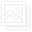
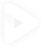
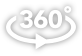
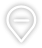

In [86]:
soup

[<span class="zPfVt">진짜 크로플 맛집이에요 🧇🍨 제가 제일 좋아하는 카페 ! 분위기도 정말 좋고 음료, 디저트도 다 맛있어요 🤍 공부하기에도 좋고 디저트 먹으면서 얘
 기 나누기에도 좋고 우드톤으로 분위기도 따뜻해서 정말 좋아요 ,! 여건만 된다면 매주 가고 싶은 카페 💛 앞으로도 자주자주 방문할거예요 ჱ̒ ｰ̀֊ｰ́ )</span>,
 <span class="zPfVt">케이크 맛있고 커피도 맛있어요
 공간이 특이해요~</span>,
 <span class="zPfVt">맛있어용~~~~ 최고체고~ 조용하구요~ 좋아용~~ 케케💗💗🐰🫶👍👍</span>,
 <span class="zPfVt">크로플 좋아하는데 낫컴플 안 가본 사람 있으시다면 꼭 가보세요 ! 제가 크로플을 엄청엄청 좋아하는데요 처음 크로플을 여기서 먹어봤고 그 이후 크로
 플로 엄청 유명한 집들은 웬만하면 다 가봤는데 낫컴플이 단연 최고예요., 🤎 심심한 맛도 없고 아이스크림이랑 로투스가루랑 바나나랑 완전히 환상의 
 조합입니다 🥐🧇💛 그리고 크로플도 진짜 쫀득하고 넘 맛있어요,, 넘 맛있어서 10번정도 방문했던 것 같은데 앞으로도 계속 갈거예요 !! 2층 분...</span>,
 <span class="zPfVt">여기.. 스콘 맛집!
 스콘 뻑뻑해서 싫어하는데 여기는 부드러워서 여기에서만 먹어용ㅎㅎ
 </span>,
 <span class="zPfVt">크로플 찐맛..! 분위기도 좋고 티도 좋은거쓰셔서 넘 행복해씁니다..! 너무유명해져서 내가 못가면 슬프겠지만 그래도 너모너모 추천하는 곳🤣</span>,
 <span class="zPfVt">크로플 맛집!! 크로플 막 가끔 생각나요! 에이드랑 같이 먹으면 꿀맛❤️ 혜화 디저트로 진짜👍🏻</span>,
 <span class="zPfVt">크로플 맛집이네요. 생지가 좋은 지 크로플이 쫄깃하고 너무 맛있었어요.
 2층이 매우 넓은 공간인데 좌석도 넓고 우드 인테리어가 참 멋져서 사진찍기도 좋았어요ㅋㅋ</span>,
 <span cl